<a href="https://colab.research.google.com/github/nan-973/assignment_/blob/main/case_study_data_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Overview**

Load the dataset House_Pricing.csv

Display basic information about the dataset using .info() and .describe() to understand the features, data types, and any initial insights into missing values.




In [77]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/House_Pricing.csv")

# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

**Duplicate Removal**

Rows: Check for duplicate rows in the dataset, if any, and remove them.

Columns: Identify and drop duplicate columns, if any, based on their values.


In [78]:
print("Duplicate rows:", df.duplicated().sum())# df.duplicated returns a boolean Series — True for duplicate rows.
df = df.drop_duplicates() # to drop them

Duplicate rows: 0


In [79]:
duplicate_columns = df.columns[df.T.duplicated()]
print("Duplicate columns:", list(duplicate_columns)) # taking transpose of df to identify duplicated columns
df = df.drop(columns=duplicate_columns) # to drop them

Duplicate columns: []


**Handling Missing Values**

Identify missing values in each column.

Handle missing values:

*   For numerical columns, use imputation techniques like mean/median imputation.
*   For categorical columns, fill with mode.

Document your approach for each feature with missing data.

In [80]:
missing_col=df.isna().sum()[df.isna().sum() > 1].sort_values(ascending=False)
missing_col

,0
No of Times Visited,19489
Flat Area (in Sqft),9
Lot Area (in Sqft),9
Sale Price,4
No of Bathrooms,4
Area of the House from Basement (in Sqft),3


In [81]:
df[missing_col.index].dtypes

,0
No of Times Visited,object
Flat Area (in Sqft),float64
Lot Area (in Sqft),float64
Sale Price,float64
No of Bathrooms,float64
Area of the House from Basement (in Sqft),float64


In [82]:
# Filling columns with missing values with float datatype with mean
# Step 1: Get float columns with missing values
float_cols = df.select_dtypes(include='float')
float_missing_cols = float_cols.columns[float_cols.isna().any()]

# Step 2: Fill based on skewness
for col in float_missing_cols:
    skewness = df[col].skew()
    if abs(skewness) > 1:
        # Highly skewed → use median
        df[col] = df[col].fillna(df[col].median())
    else:
        # Approximately symmetric → use mean
        df[col] = df[col].fillna(df[col].mean())

# Filling columns with missing values with object datatype with mode
# Step 1: Select object columns
ob_df = df.select_dtypes(include='object')

# Step 2: Find columns with missing values
ob_has_na = ob_df.columns[ob_df.isna().any()]

# Step 3: Fill missing values with mode (most frequent value)
for col in ob_has_na:
    df[col] = df[col].fillna(df[col].mode()[0])

In [83]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,0


**Outlier Removal**

Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).

Remove outliers from these features if they are not representative of typical house prices


In [84]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [85]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_limit, upper_limit)

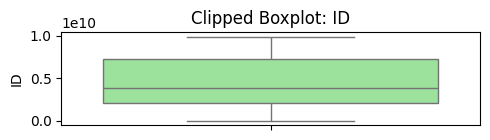

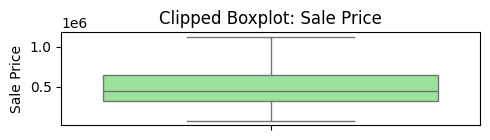

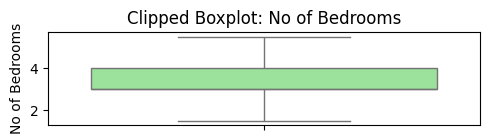

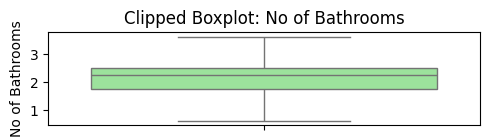

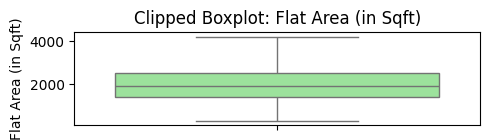

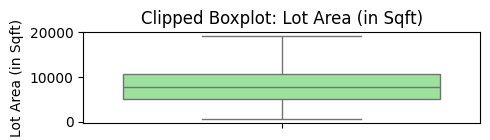

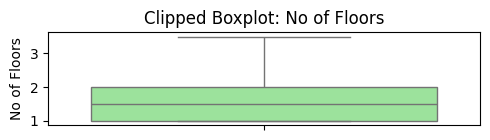

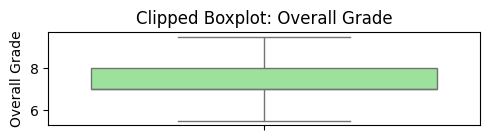

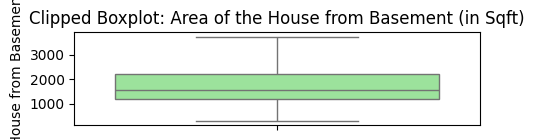

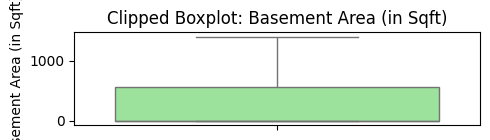

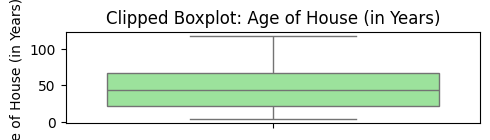

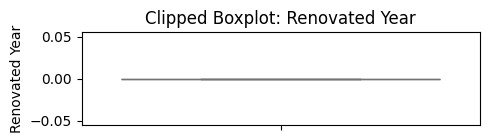

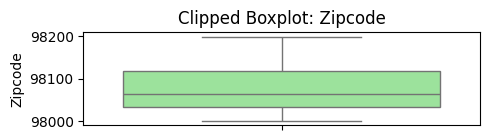

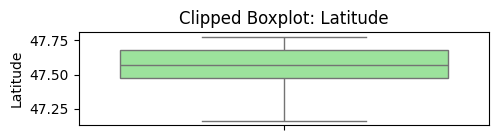

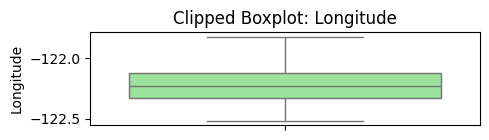

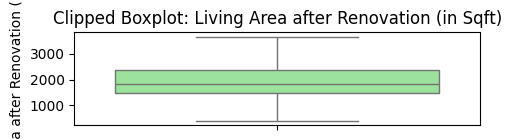

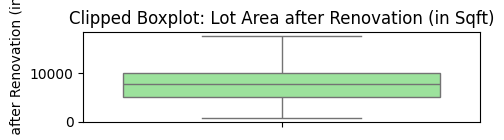

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize after clipping
for col in numerical_cols:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Clipped Boxplot: {col}')
    plt.tight_layout()
    plt.show()

**Encoding Categorical Variables**

Identify all categorical columns in the dataset.

Apply appropriate encoding techniques:
* Use One-Hot Encoding for nominal categories.
* Use Label Encoding for ordinal categories, if applicable.


In [87]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [88]:
print(df['Waterfront View'].unique())
print(df['No of Times Visited'].unique())
print(df['Condition of the House'].unique())

['No' 'Yes']
['Twice' 'Thrice' 'Four' 'Once']
['Fair' 'Excellent' 'Good' 'Bad' 'Okay']


In [89]:
# assuming all categorical columns as nominal
from sklearn.preprocessing import OneHotEncoder

# One-hot encode all categorical features (assuming nominal for now)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0,...,False,False,False,False,False,True,False,True,False,False
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400,...,False,False,False,False,False,True,False,True,False,False
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0,...,False,False,False,False,False,True,False,True,False,False
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910,...,False,False,False,False,False,True,True,False,False,False
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0,...,False,False,False,False,False,True,False,True,False,False


**Scaling Numerical Variables**

Identify all numerical columns (excluding the target variable SalePrice).

Scale these features using techniques like Min-Max scaling or Standard scaling.


In [90]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from scaling
numerical_cols.remove('Sale Price')

# Apply Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0,1))
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,0.720103,221900.0,0.375,0.125000,0.225888,0.275325,0.0,0.375,0.257971,0.000000,...,False,False,False,False,False,True,False,True,False,False
1,0.647853,538000.0,0.375,0.541667,0.578680,0.360767,0.4,0.375,0.544928,0.285714,...,False,False,False,False,False,True,False,True,False,False
2,0.568795,180000.0,0.125,0.125000,0.121827,0.508788,0.0,0.125,0.139130,0.000000,...,False,False,False,False,False,True,False,True,False,False
3,0.251157,604000.0,0.625,0.791667,0.423858,0.240440,0.0,0.375,0.220290,0.650000,...,False,False,False,False,False,True,True,False,False,False
4,0.197333,510000.0,0.375,0.458333,0.352792,0.405743,0.0,0.625,0.402899,0.000000,...,False,False,False,False,False,True,False,True,False,False


**Train-Test Split**

Set aside the SalePrice column as the target variable.

Split the dataset into training (80%) and testing (20%) sets using the train_test_split function from sklearn.

In [91]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Sale Price']) # x represents features
y = df['Sale Price'] # y represents the target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # variables should be in same order,
# percent of test=20%, random_state to use same random pattern all the time

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

# y has no column as it takes only one column-survived

Shape of x_train: (17290, 36)
Shape of x_test: (4323, 36)
Shape of y_train: (17290,)
Shape of y_test: (4323,)
